# MNIST Handwritten Digit Classification using Multilayer Perceptron

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import pandas
from sklearn import metrics

In [2]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [3]:
# Normalizing pixel intensity
X = X / 255.0

In [4]:
X_train = X[:60000]
X_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:]

In [5]:
model = MLPClassifier(
    hidden_layer_sizes=(80,30,10),
    activation= "tanh",
    solver="sgd",
    alpha=1e-4,
    verbose=10,
    random_state=1,
    learning_rate_init=0.1,
    batch_size = 200,
    max_iter=50,
)

In [6]:
model.fit(X_train, y_train)

Iteration 1, loss = 0.36346019
Iteration 2, loss = 0.13859750
Iteration 3, loss = 0.10562849
Iteration 4, loss = 0.08557375
Iteration 5, loss = 0.07443305
Iteration 6, loss = 0.06413101
Iteration 7, loss = 0.05786220
Iteration 8, loss = 0.05064319
Iteration 9, loss = 0.04332692
Iteration 10, loss = 0.03966056
Iteration 11, loss = 0.03714910
Iteration 12, loss = 0.03149878
Iteration 13, loss = 0.02875025
Iteration 14, loss = 0.02784792
Iteration 15, loss = 0.02381642
Iteration 16, loss = 0.02434061
Iteration 17, loss = 0.02247602
Iteration 18, loss = 0.02096943
Iteration 19, loss = 0.02224600
Iteration 20, loss = 0.02182063
Iteration 21, loss = 0.01641232
Iteration 22, loss = 0.01923873
Iteration 23, loss = 0.01631675
Iteration 24, loss = 0.01867606
Iteration 25, loss = 0.01653694
Iteration 26, loss = 0.02170261
Iteration 27, loss = 0.01493141
Iteration 28, loss = 0.01312539
Iteration 29, loss = 0.01455409
Iteration 30, loss = 0.01351492
Iteration 31, loss = 0.01151862
Iteration 32, los

c:\users\berkay\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', batch_size=200,
              hidden_layer_sizes=(80, 30, 10), learning_rate_init=0.1,
              max_iter=50, random_state=1, solver='sgd', verbose=10)

In [7]:
print("Train score:", model.score(X_train, y_train))
print("Test score:",  model.score(X_test, y_test))

Train score: 0.99995
Test score: 0.9768


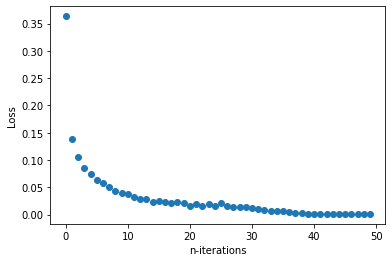

In [8]:
# The cost function
fig, axes = plt.subplots(1, 1)
axes.plot(model.loss_curve_, 'o')
axes.set_xlabel("n-iterations")
axes.set_ylabel("Loss")
plt.show()

#### So roughly 40 iterations are enough for convergence with these parameters.

In [10]:
y_train_expected = y_train
y_train_predicted = model.predict(X_train)

print(metrics.classification_report(y_train_expected, y_train_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5923
           1       1.00      1.00      1.00      6742
           2       1.00      1.00      1.00      5958
           3       1.00      1.00      1.00      6131
           4       1.00      1.00      1.00      5842
           5       1.00      1.00      1.00      5421
           6       1.00      1.00      1.00      5918
           7       1.00      1.00      1.00      6265
           8       1.00      1.00      1.00      5851
           9       1.00      1.00      1.00      5949

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000



In [11]:
y_test_expected = y_test
y_test_predicted = model.predict(X_test)

print(metrics.classification_report(y_test_expected, y_test_predicted))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.96      0.98      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.97      0.97       892
           6       0.99      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.96      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

